# Análise de dados dos chamados 1746 com geolocalização

Esse notebook apresenta as respostas para as perguntas do arquivo `perguntas_desafio.md` relacionados a localização dos chamados 1746.

O dataset utilizado para a análise é gerado pelo arquivo `01_generate_dataset_localizacao_chamados.py`. Nele estão contidos dados referentes a abril de 2023. Cada linha corresponde a um chamado com informações da localização, qual seu tipo e subtipo, data de inicio e fim do chamado, além de informações do bairro do chamado. As tabelas utilizadas para obter essas informações são: `datario.dados_mestres.bairro` e `datario.administracao_servicos_publicos.chamado_1746`.

# 1. Imports

In [1]:
import pandas as pd
from datetime import date

# 2. Read dataset

In [3]:
df = pd.read_parquet(
    "../datasets/raw/dataset_daily_chamado1746_2023-04-01.parquet.gzip"
)
print("dataset shape: ", df.shape)
df.head()

dataset shape:  (73, 17)


,id_chamado,data_inicio,id_bairro,nome_bairro,subprefeitura,geometry_bairro,categoria,id_tipo,tipo,id_subtipo,subtipo,status,situacao,tipo_situacao,latitude,longitude,geometry_chamado
0,18516246,2023-04-01 00:55:38,None,None,None,None,Serviço,93,Ônibus,1242,Verificação de ar condicionado inoperante no ô...,Fechado com informação,Encerrado,Atendido parcialmente,NaN,NaN,None
1,18516254,2023-04-01 01:08:04,1,Saúde,Centro,"POLYGON((-43.181151633503 -22.8954302843042, -...",Serviço,782,Estacionamento Irregular,2966,Fiscalização de estacionamento irregular de ve...,Não constatado,Encerrado,Não constatado,NaN,NaN,None
2,18516194,2023-04-01 00:04:59,14,Santa Teresa,Centro,"POLYGON((-43.1910446302859 -22.9133826039149, ...",Serviço,243,Comércio ambulante,1101,Fiscalização de comércio ambulante,Aberto,Não Encerrado,Andamento,-22.921335,-43.186679,POINT(-43.186679 -22.921335)
3,18516238,2023-04-01 00:38:22,5,Centro,Centro,MULTIPOLYGON(((-43.1658052142561 -22.897041460...,Serviço,244,Feiras,1108,"Fiscalização/Inspeção de feira livre, feira de...",Aberto,Não Encerrado,Andamento,-22.912229,-43.188253,POINT(-43.1882526 -22.9122295)
4,18516208,2023-04-01 00:14:00,14,Santa Teresa,Centro,"POLYGON((-43.1910446302859 -22.9133826039149, ...",Serviço,246,Ocupação de área pública,1111,Fiscalização da ocupação de área pública por m...,Aberto,Não Encerrado,Andamento,-22.921123,-43.187288,POINT(-43.1872883 -22.9211226)


A seguir, vamos fazer algumas validações a respeito:
- Tipos dos dados
- Quantidade de valores nulos
- Se existe dados duplicados

In [4]:
## Visualizando dtypes
df.dtypes

id_chamado                  object
data_inicio         datetime64[ns]
id_bairro                   object
nome_bairro                 object
subprefeitura               object
geometry_bairro             object
categoria                   object
id_tipo                     object
tipo                        object
id_subtipo                  object
subtipo                     object
status                      object
situacao                    object
tipo_situacao               object
latitude                   float64
longitude                  float64
geometry_chamado            object
dtype: object

Os dados estão com seus tipos corretos e iguais ao visto no BigQuery.

É importante que os id_chamados sejam únicos pois isso garante que cada linha se refira a um único chamado. Para garantir que está tudo correto, vamos verificar se temos ids duplicados

In [5]:
df[df.duplicated(subset=["id_chamado"])]

,id_chamado,data_inicio,id_bairro,nome_bairro,subprefeitura,geometry_bairro,categoria,id_tipo,tipo,id_subtipo,subtipo,status,situacao,tipo_situacao,latitude,longitude,geometry_chamado


Agora vamos avaliar a quantidade de dados nulos. É importante que não exista id_chamados nulos e também que cada um seja associado a uma data_inicio pois assim evitamos perdas de registros.

In [6]:
# Verificando valores nulos
(df.isnull().sum() / df.shape[0]) * 100.0

id_chamado           0.000000
data_inicio          0.000000
id_bairro            1.369863
nome_bairro          1.369863
subprefeitura        1.369863
geometry_bairro      1.369863
categoria            0.000000
id_tipo              0.000000
tipo                 0.000000
id_subtipo           0.000000
subtipo              0.000000
status               0.000000
situacao             0.000000
tipo_situacao        0.000000
latitude            24.657534
longitude           24.657534
geometry_chamado    24.657534
dtype: float64

Por fim, vamos avaliar que os dados contidos nesse dataset contém apenas dados de 04/2023.

In [11]:
print("Valores de meses únicos:", pd.unique(df["data_inicio"].dt.month))
print("Valores de anos únicos:", pd.unique(df["data_inicio"].dt.year))

Valores de meses únicos: [4]
Valores de anos únicos: [2023]


Os dados estão com ótima qualidade! Não existe id_chamado duplicados e nulos (estão consistentes), os tipos de dados estão corretos e conforme tabelas `chamado_1746` e `bairros` do datalake datario e também cada chamado tem sua data_inicio definida com todos os dados sendo de abril de 2023!

# 3. Respondendo perguntas

Com os dados validados, agora vamos responder as perguntas!

## 1. Quantos chamados foram abertos no dia 01/04/2023?


In [12]:
print("Quantidade de chamados em 01/04/2023: ", df.shape[0])

Quantidade de chamados em 01/04/2023:  73


## 2. Qual o tipo de chamado que teve mais teve chamados abertos no dia 01/04/2023?


Poluição sonora             24
Estacionamento Irregular     9
Iluminação Pública           8
Remoção Gratuita             5
Limpeza                      5
Postura Municipal            4
Ocupação de área pública     3
Pavimentação                 3
Comlurb - Vetores            2
Fiscalização de obras        2
Manejo Arbóreo               2
Programa Cegonha Carioca     1
Ônibus                       1
Drenagem e Saneamento        1
Feiras                       1
Comércio ambulante           1
Semáforo                     1
Name: tipo, dtype: int64

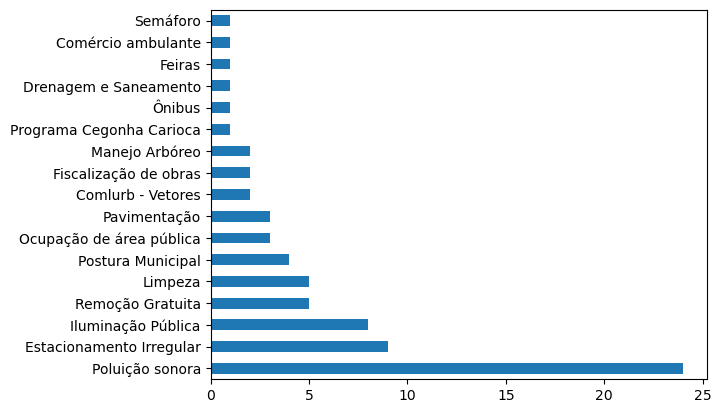

In [13]:
df["tipo"].value_counts().plot.barh()
df["tipo"].value_counts()

Conforme ilustra os dados acima, poluição sonora foi o que mais apresentou chamados em 01/04/2023 seguido de estacionamento irregular e iluminação pública.

## 3. Quais os nomes dos 3 bairros que mais tiveram chamados abertos nesse dia?


Engenho de Dentro    8
Leblon               6
Campo Grande         6
Barra da Tijuca      5
Engenho da Rainha    5
Tijuca               3
Santa Teresa         3
Paciência            2
Vila da Penha        2
Lapa                 2
Name: nome_bairro, dtype: int64

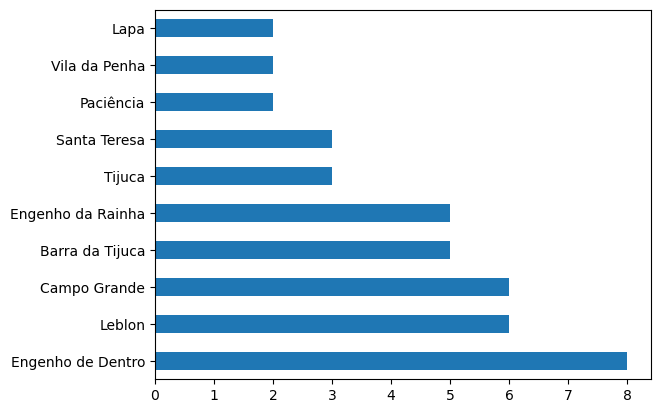

In [14]:
df["nome_bairro"].value_counts(ascending=False)[:10].plot.barh()
df["nome_bairro"].value_counts(ascending=False)[:10]

Engenho de Dentro, Leblon e Campo Grande de acordo com os dados são os bairros com mais chamados abertos em 01/04/2023

## 4. Qual o nome da subprefeitura com mais chamados abertos nesse dia?


Zona Norte         25
Zona Sul           12
Zona Oeste         10
Centro              7
Barra da Tijuca     6
Jacarepaguá         5
Grande Tijuca       4
Grande Bangu        3
Name: subprefeitura, dtype: int64

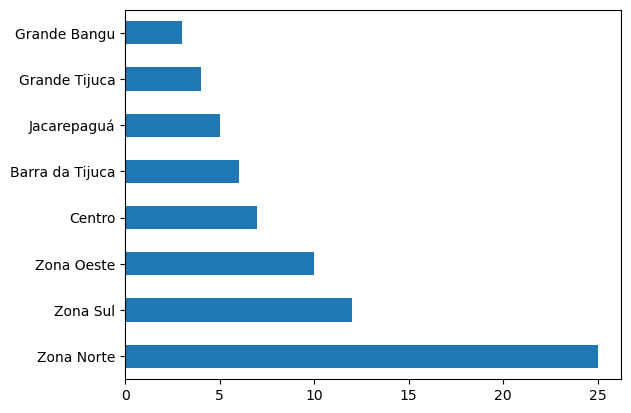

In [16]:
df["subprefeitura"].value_counts(ascending=False).plot.barh()
df["subprefeitura"].value_counts()

A subprefeitura da Zona Norte foi que a mais teves chamados abertos em 01/04/2023

## 5. Existe algum chamado aberto nesse dia que não foi associado a um bairro ou subprefeitura na tabela de bairros? Se sim, por que isso acontece?


Sim, existe um registro que não está associado a um id_bairro, por causa disso, ele não tem informações de bairro e subprefeitura.

In [18]:
df[["id_bairro", "nome_bairro", "subprefeitura"]].isna().sum()

id_bairro        1
nome_bairro      1
subprefeitura    1
dtype: int64

In [19]:
df[
    (df["id_bairro"].isnull())
    | (df["nome_bairro"].isnull())
    | (df["subprefeitura"].isnull())
]

,id_chamado,data_inicio,id_bairro,nome_bairro,subprefeitura,geometry_bairro,categoria,id_tipo,tipo,id_subtipo,subtipo,status,situacao,tipo_situacao,latitude,longitude,geometry_chamado
0,18516246,2023-04-01 00:55:38,None,None,None,None,Serviço,93,Ônibus,1242,Verificação de ar condicionado inoperante no ô...,Fechado com informação,Encerrado,Atendido parcialmente,NaN,NaN,None
